# FINT30AllData: Volume and Density Analysis

Calculate Volume and Density for each RipUnit, then summarize by Basin and Sub_Basin:
- **Density (m³/ha)** = Mean (m) × Basal_Area (m²/ha)
- **Volume (m³)** = Density (m³/ha) × Surface (ha)

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

# Load data
data_path = Path(r'C:\Users\jdelhoyo\PhD\Study cases\Genissiat\RV Characterization\repo-github\data\FINT30AllData.csv')
df = pd.read_csv(data_path)

print('Data loaded successfully')
print(f'Shape: {df.shape}')
print(f'\nColumns:\n{df.columns.tolist()}')
print(f'\nFirst 3 rows:')
print(df.head(3))
print(f'\nData types:\n{df.dtypes}')

Data loaded successfully
Shape: (88, 15)

Columns:
['Id_RipUnit', 'Id_Reach', 'Basin', 'Sub_Basin', 'Reach', 'Bank', 'RipUnit', 'Q25', 'Q50_Median', 'Q75', 'Count', 'Mean (m)', 'Std', 'Basal_Area (m2/ha)', 'Surface (ha)']

First 3 rows:
   Id_RipUnit  Id_Reach Basin Sub_Basin  Reach    Bank      RipUnit   Q25  \
0          19        10  Arve      Arve  A-A10   Left    A-A10-Left  11.1   
1          20        10  Arve      Arve  A-A10  Right   A-A10-Right  12.2   
2          21        11  Arve      Arve  A-A11   Left    A-A11-Left  10.0   

   Q50_Median   Q75  Count  Mean (m)   Std  Basal_Area (m2/ha)  Surface (ha)  
0       14.50  17.0    323     14.29  4.14            29.86217        7.3183  
1       15.50  18.4    583     15.37  4.75            30.21011        9.9460  
2       13.75  17.5    778     13.99  5.22            33.19464       14.8728  

Data types:
Id_RipUnit              int64
Id_Reach                int64
Basin                  object
Sub_Basin              object
Reach

In [54]:
# Calculate Density and Volume for each row
# Density (m³/ha) = Mean (m) × Basal_Area (m²/ha)
# Volume (m³) = Density (m³/ha) × Surface (ha)

df['Density (m3/ha)'] = df['Mean (m)'] * df['Basal_Area (m2/ha)']
df['Volume (m3)'] = df['Density (m3/ha)'] * df['Surface (ha)']

print('Columns created:')
print('  ✓ Density (m³/ha) = Mean (m) × Basal_Area (m²/ha)')
print('  ✓ Volume (m³) = Density (m³/ha) × Surface (ha)')
print(f'\nTotal records: {len(df)}')
print('\nFirst few rows with calculations:')
print(df[['RipUnit', 'Mean (m)', 'Basal_Area (m2/ha)', 'Surface (ha)', 'Density (m3/ha)', 'Volume (m3)']].head())

Columns created:
  ✓ Density (m³/ha) = Mean (m) × Basal_Area (m²/ha)
  ✓ Volume (m³) = Density (m³/ha) × Surface (ha)

Total records: 88

First few rows with calculations:
       RipUnit  Mean (m)  Basal_Area (m2/ha)  Surface (ha)  Density (m3/ha)  \
0   A-A10-Left     14.29            29.86217        7.3183       426.730409   
1  A-A10-Right     15.37            30.21011        9.9460       464.329391   
2   A-A11-Left     13.99            33.19464       14.8728       464.393014   
3  A-A11-Right     12.97            24.17380       13.6809       313.534186   
4   A-A12-Left     15.60            46.14998       19.4011       719.939688   

    Volume (m3)  
0   3122.941154  
1   4618.220120  
2   6906.824413  
3   4289.429845  
4  13967.621881  


In [55]:
# Summary by Basin: Total Density and Volume
print('\n' + '='*80)
print('SUMMARY BY BASIN')
print('='*80)
summary_basin = df.groupby('Basin')[['Density (m3/ha)', 'Volume (m3)']].sum().round(2)
print(summary_basin)


SUMMARY BY BASIN
           Density (m3/ha)  Volume (m3)
Basin                                  
Arve              30577.63    408144.57
Rhone              7000.96    132403.48
Valserine         16499.13    201334.31


In [56]:
# Summary by Sub_Basin: Total Density and Volume
print('\n' + '='*80)
print('SUMMARY BY SUB_BASIN')
print('='*80)
summary_subbasin = df.groupby('Sub_Basin')[['Density (m3/ha)', 'Volume (m3)']].sum().round(2)
print(summary_subbasin)


SUMMARY BY SUB_BASIN
           Density (m3/ha)  Volume (m3)
Sub_Basin                              
Arve              16768.90    218278.98
Giffre            10162.36    124603.37
Menoge             3646.36     65262.22
Rhone              7000.96    132403.48
Semine             5957.78     64091.20
Valserine         10541.36    137243.11


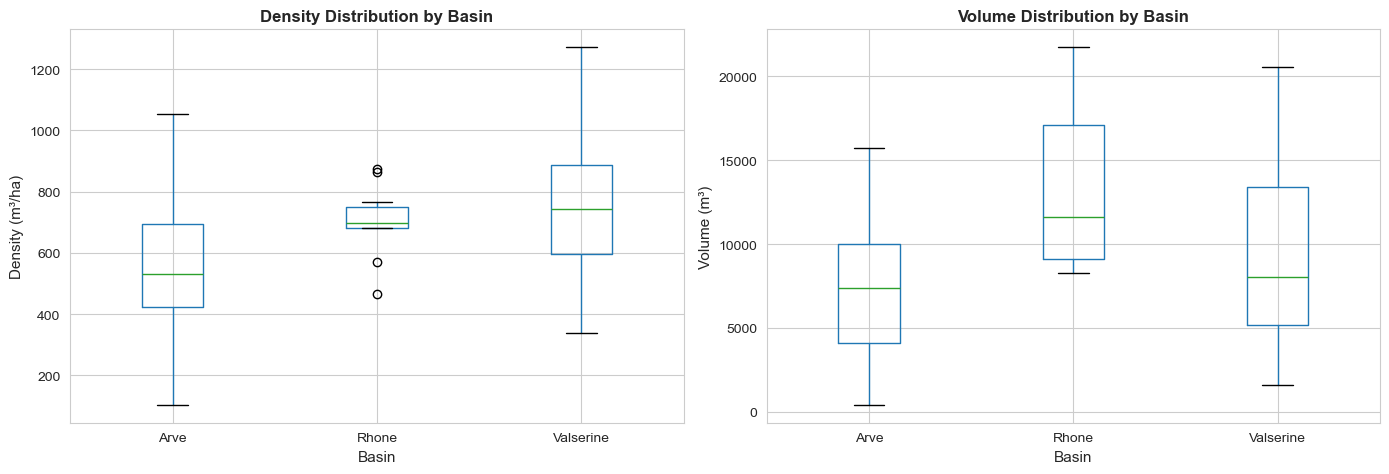

In [58]:
# Boxplots by Basin
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Density by Basin
df.boxplot(column='Density (m3/ha)', by='Basin', ax=axes[0])
axes[0].set_title('Density Distribution by Basin', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Basin', fontsize=11)
axes[0].set_ylabel('Density (m³/ha)', fontsize=11)
plt.sca(axes[0])
plt.xticks(rotation=0)

# Volume by Basin
df.boxplot(column='Volume (m3)', by='Basin', ax=axes[1])
axes[1].set_title('Volume Distribution by Basin', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Basin', fontsize=11)
axes[1].set_ylabel('Volume (m³)', fontsize=11)
plt.sca(axes[1])
plt.xticks(rotation=0)

plt.suptitle('')
plt.tight_layout()
plt.show()

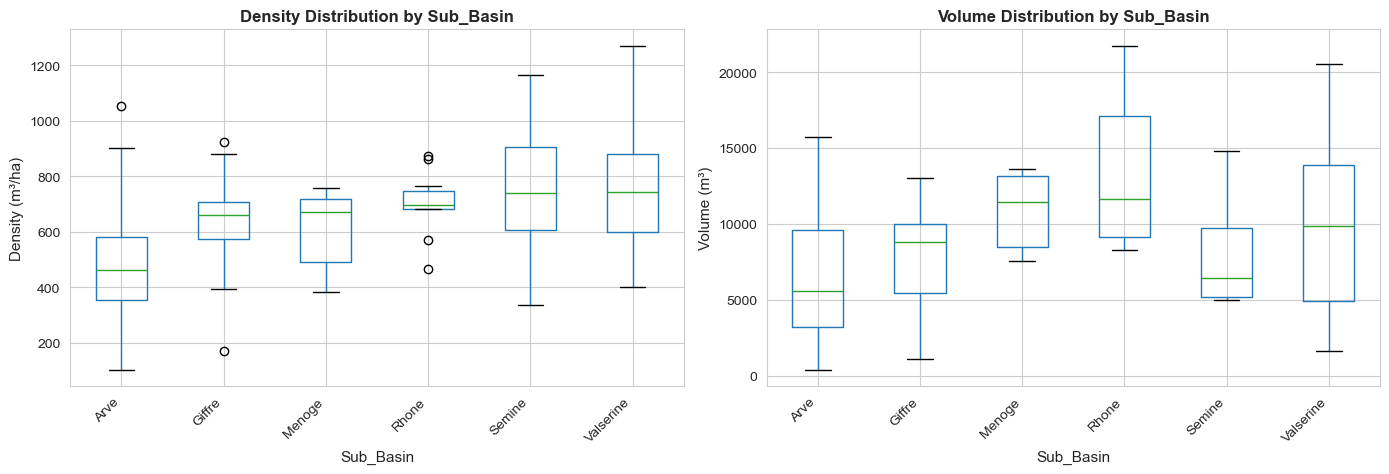

In [60]:
# Boxplots by Sub_Basin
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Density by Sub_Basin
df.boxplot(column='Density (m3/ha)', by='Sub_Basin', ax=axes[0])
axes[0].set_title('Density Distribution by Sub_Basin', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sub_Basin', fontsize=11)
axes[0].set_ylabel('Density (m³/ha)', fontsize=11)
plt.sca(axes[0])
plt.xticks(rotation=45, ha='right')

# Volume by Sub_Basin
df.boxplot(column='Volume (m3)', by='Sub_Basin', ax=axes[1])
axes[1].set_title('Volume Distribution by Sub_Basin', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Sub_Basin', fontsize=11)
axes[1].set_ylabel('Volume (m³)', fontsize=11)
plt.sca(axes[1])
plt.xticks(rotation=45, ha='right')

plt.suptitle('')
plt.tight_layout()
plt.show()

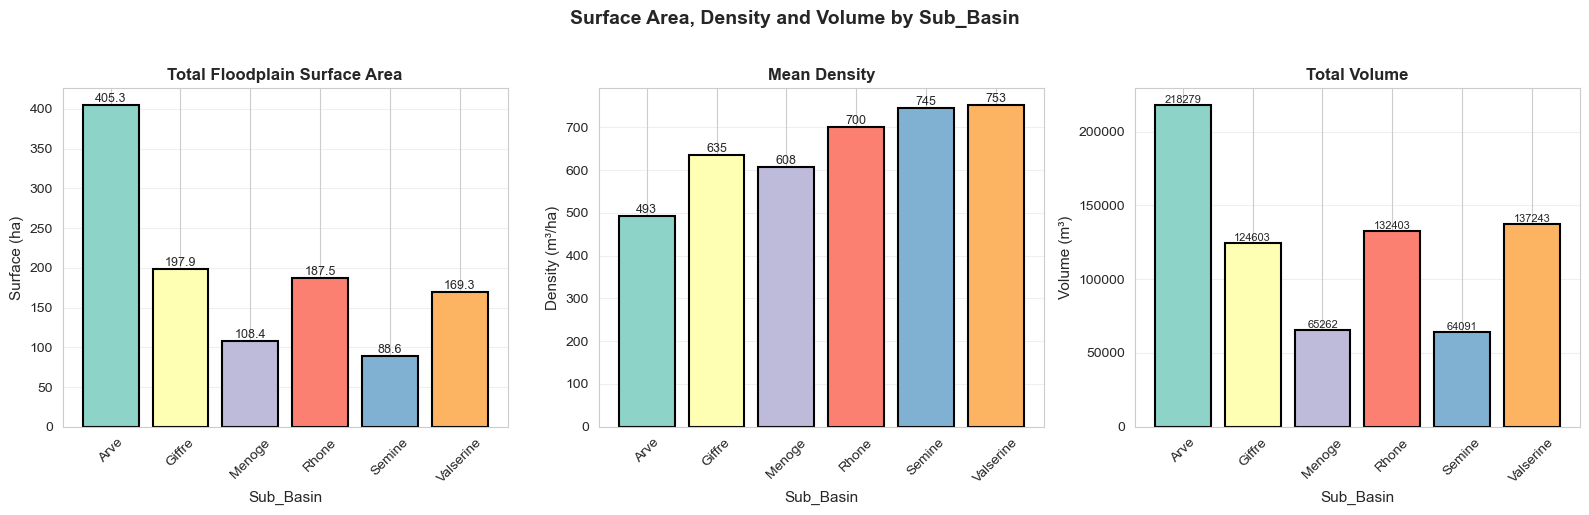


Summary Table:
           Surface (ha)  Density (m3/ha)  Volume (m3)
Sub_Basin                                            
Arve             405.31           493.20    218278.98
Giffre           197.95           635.15    124603.37
Menoge           108.40           607.73     65262.22
Rhone            187.46           700.10    132403.48
Semine            88.60           744.72     64091.20
Valserine        169.33           752.95    137243.11


In [61]:
# Prepare aggregated data by Sub_Basin for comparison chart
summary_stats = df.groupby('Sub_Basin').agg({
    'Surface (ha)': 'sum',
    'Density (m3/ha)': 'mean',
    'Volume (m3)': 'sum'
}).round(2)

# Create figure with subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Colors for each sub-basin
colors = plt.cm.Set3(range(len(summary_stats)))

# Plot 1: Total Surface (ha)
ax1 = axes[0]
bars1 = ax1.bar(summary_stats.index, summary_stats['Surface (ha)'], color=colors, edgecolor='black', linewidth=1.5)
ax1.set_title('Total Floodplain Surface Area', fontsize=12, fontweight='bold')
ax1.set_xlabel('Sub_Basin', fontsize=11)
ax1.set_ylabel('Surface (ha)', fontsize=11)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Mean Density (m³/ha)
ax2 = axes[1]
bars2 = ax2.bar(summary_stats.index, summary_stats['Density (m3/ha)'], color=colors, edgecolor='black', linewidth=1.5)
ax2.set_title('Mean Density', fontsize=12, fontweight='bold')
ax2.set_xlabel('Sub_Basin', fontsize=11)
ax2.set_ylabel('Density (m³/ha)', fontsize=11)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}', ha='center', va='bottom', fontsize=9)

# Plot 3: Total Volume (m³)
ax3 = axes[2]
bars3 = ax3.bar(summary_stats.index, summary_stats['Volume (m3)'], color=colors, edgecolor='black', linewidth=1.5)
ax3.set_title('Total Volume', fontsize=12, fontweight='bold')
ax3.set_xlabel('Sub_Basin', fontsize=11)
ax3.set_ylabel('Volume (m³)', fontsize=11)
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}', ha='center', va='bottom', fontsize=8)

plt.suptitle('Surface Area, Density and Volume by Sub_Basin', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print('\nSummary Table:')
print(summary_stats)

In [48]:
# Summary statistics for Density by geographic levels
print('\n' + '='*80)
print('DENSITY STATISTICS BY GEOGRAPHIC LEVEL')
print('='*80)

if 'Basin' in df.columns:
    print('\nBy Basin:')
    print(df.groupby('Basin')['Density'].describe().round(2))

if 'Sub_Basin' in df.columns:
    print('\nBy Sub_Basin:')
    print(df.groupby('Sub_Basin')['Density'].describe().round(2))

if 'Reach' in df.columns:
    print('\nBy Reach:')
    print(df.groupby('Reach')['Density'].describe().round(2))

if 'RipUnit' in df.columns:
    print('\nBy RipUnit (first 20):')
    print(df.groupby('RipUnit')['Density'].describe().round(2).head(20))


DENSITY STATISTICS BY GEOGRAPHIC LEVEL

By Basin:
           count    mean     std     min     25%     50%     75%      max
Basin                                                                    
Arve        56.0  546.03  207.58  103.91  422.09  531.88  694.50  1054.73
Rhone       10.0  700.10  121.86  467.26  681.37  698.45  749.17   875.27
Valserine   22.0  749.96  232.47  336.88  595.40  742.09  887.09  1271.23

By Sub_Basin:
           count    mean     std     min     25%     50%     75%      max
Sub_Basin                                                                
Arve        34.0  493.20  212.33  103.91  356.27  463.02  583.07  1054.73
Giffre      16.0  635.15  184.84  169.88  575.78  660.56  709.43   923.61
Menoge       6.0  607.73  158.11  382.80  490.35  671.21  717.60   758.03
Rhone       10.0  700.10  121.86  467.26  681.37  698.45  749.17   875.27
Semine       8.0  744.72  264.71  336.88  606.45  741.75  906.10  1165.73
Valserine   14.0  752.95  222.59  399.85  600.